# Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import nnfs.datasets
import nnfs

In [11]:
from model.neural_network import NeuralNetwork

from model.layers.dense import DenseLayer
from model.optimizers.adam import Adam

# Regression Testing

In [15]:
x, y = nnfs.datasets.sine_data()

model = NeuralNetwork([
    DenseLayer(1, 64, activation='Relu'),
    DenseLayer(64, 64, activation='Relu'),
    DenseLayer(64, 1)
])

model.set(
    loss='MeanSquaredError',
    optimizer=Adam(learning_rate=0.005, decay=1e-3)
)

model.train(x, y, epochs=3000)

epoch: 0, loss: 0.500, lr: 0.00500
epoch: 100, loss: 0.081, lr: 0.00455
epoch: 200, loss: 0.034, lr: 0.00417
epoch: 300, loss: 0.005, lr: 0.00385
epoch: 400, loss: 0.001, lr: 0.00357
epoch: 500, loss: 0.000, lr: 0.00334
epoch: 600, loss: 0.000, lr: 0.00313
epoch: 700, loss: 0.000, lr: 0.00294
epoch: 800, loss: 0.000, lr: 0.00278
epoch: 900, loss: 0.000, lr: 0.00263
epoch: 1000, loss: 0.000, lr: 0.00250
epoch: 1100, loss: 0.000, lr: 0.00238
epoch: 1200, loss: 0.000, lr: 0.00227
epoch: 1300, loss: 0.000, lr: 0.00217
epoch: 1400, loss: 0.000, lr: 0.00208
epoch: 1500, loss: 0.000, lr: 0.00200
epoch: 1600, loss: 0.000, lr: 0.00192
epoch: 1700, loss: 0.000, lr: 0.00185
epoch: 1800, loss: 0.000, lr: 0.00179
epoch: 1900, loss: 0.000, lr: 0.00172
epoch: 2000, loss: 0.000, lr: 0.00167
epoch: 2100, loss: 0.000, lr: 0.00161
epoch: 2200, loss: 0.000, lr: 0.00156
epoch: 2300, loss: 0.000, lr: 0.00152
epoch: 2400, loss: 0.000, lr: 0.00147
epoch: 2500, loss: 0.000, lr: 0.00143
epoch: 2600, loss: 0.000

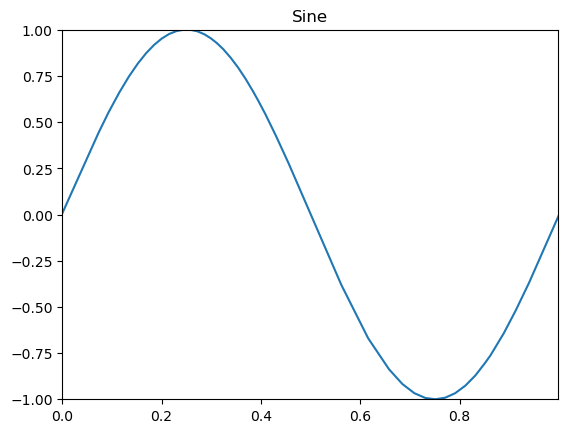

In [16]:
x_test, y_test = nnfs.datasets.sine_data()

outputs = model.forward(x_test)
plt.xlim(x_test.min(), x_test.max())
plt.ylim(outputs.min(), outputs.max())
plt.title(f"Sine")
plt.plot(x_test, outputs)
plt.show()

In [17]:
x, y = nnfs.datasets.spiral_data(500, classes=2)
y = y.reshape(-1, 1)

model = NeuralNetwork([
    DenseLayer(2, 256, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DenseLayer(256, 1, activation='Sigmoid')
])

model.set(
    loss='BinaryCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x, y, epochs=10000)

epoch: 0, loss: 0.693, lr: 0.00100
epoch: 100, loss: 0.671, lr: 0.00100
epoch: 200, loss: 0.667, lr: 0.00100
epoch: 300, loss: 0.661, lr: 0.00100
epoch: 400, loss: 0.649, lr: 0.00100
epoch: 500, loss: 0.631, lr: 0.00100
epoch: 600, loss: 0.606, lr: 0.00100
epoch: 700, loss: 0.572, lr: 0.00100
epoch: 800, loss: 0.535, lr: 0.00100
epoch: 900, loss: 0.507, lr: 0.00100
epoch: 1000, loss: 0.485, lr: 0.00100
epoch: 1100, loss: 0.467, lr: 0.00100
epoch: 1200, loss: 0.451, lr: 0.00100
epoch: 1300, loss: 0.438, lr: 0.00100
epoch: 1400, loss: 0.426, lr: 0.00100
epoch: 1500, loss: 0.415, lr: 0.00100
epoch: 1600, loss: 0.405, lr: 0.00100
epoch: 1700, loss: 0.396, lr: 0.00100
epoch: 1800, loss: 0.387, lr: 0.00100
epoch: 1900, loss: 0.379, lr: 0.00100
epoch: 2000, loss: 0.372, lr: 0.00100
epoch: 2100, loss: 0.365, lr: 0.00100
epoch: 2200, loss: 0.358, lr: 0.00100
epoch: 2300, loss: 0.352, lr: 0.00100
epoch: 2400, loss: 0.346, lr: 0.00100
epoch: 2500, loss: 0.341, lr: 0.00100
epoch: 2600, loss: 0.336

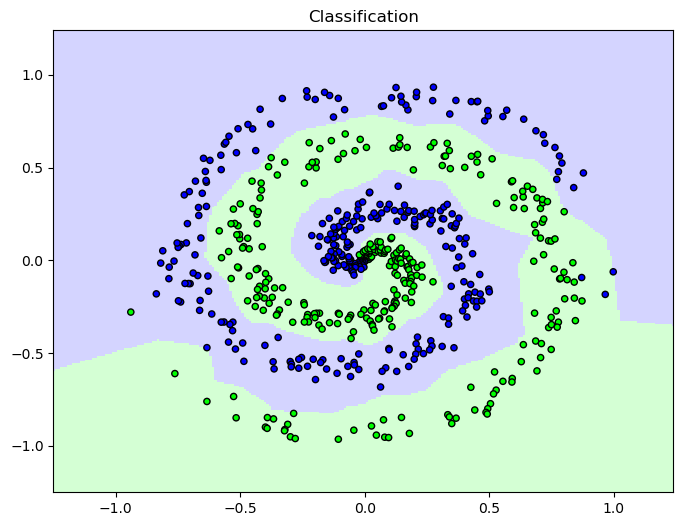

In [19]:
x_test, y_test = nnfs.datasets.spiral_data(samples=300, classes=2)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

outputs = model.forward(np.c_[xx.ravel(), yy.ravel()])
z = (outputs > 0.5) * 1
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Classification")
plt.show()